In [1]:
#import the necessary modules
% pylab inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#load the white wine quality dataset.
filename = 'winequality-white.csv' 
df = pd.read_csv(filename, sep=';')

#print the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
#Separate data into poor, mediocre, and desirable wines
def quality_grading(quality):
    if quality > 6:
        return 2
    elif quality == 6:
        return 1
    else:
        return 0

In [4]:
df['desirable_label'] = df['quality'].apply(quality_grading)
count_label = df.desirable_label.value_counts().sort_index()
count_label

0    1640
1    2198
2    1060
Name: desirable_label, dtype: int64

In [5]:
df['chlorides'] = np.log(df['chlorides'])
df['residual sugar'] = np.log(df['residual sugar'])
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])

In [6]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
scaled_df = scaler.fit_transform(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
scaled_df = pd.DataFrame(scaled_df, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [7]:
scaled_df['desirable_label'] = df['desirable_label']
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,desirable_label
0,0.2,0.090909,0.333333,0.784080,0.138392,0.404390,0.545949,1.658481,-0.947368,-0.142857,-0.842105,1
1,-0.5,0.363636,0.166667,-0.668966,0.397621,-1.280108,-0.034501,0.059395,0.631579,0.142857,-0.473684,1
2,1.3,0.181818,0.666667,0.160544,0.459120,-0.180572,-0.741355,0.310680,0.421053,-0.214286,-0.157895,1
3,0.4,-0.272727,0.000000,0.278907,0.910926,0.467126,0.752317,0.424900,0.052632,-0.500000,-0.263158,1
4,0.4,-0.272727,0.000000,0.278907,0.910926,0.467126,0.752317,0.424900,0.052632,-0.500000,-0.263158,1


In [8]:
#Prepare the variables and target vectors for classification
y = scaled_df['desirable_label']
X = scaled_df.drop(['desirable_label'],axis=1)

#Split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [11]:
LR = pickle.load(open('LR_cap1.pkl','rb'))

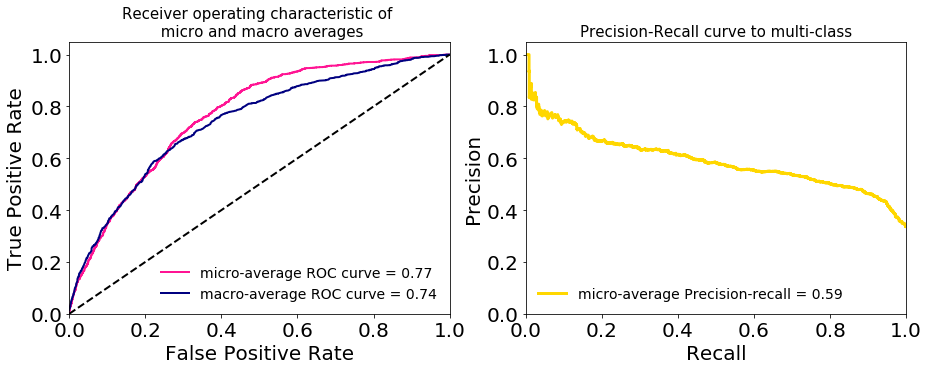

In [12]:
plots(LR, X_test, y_test, outputfile='LR_ROC_PR_plots.pdf')

## Random Forest

In [13]:
RF = pickle.load(open('RF_cap1.pkl','rb'))

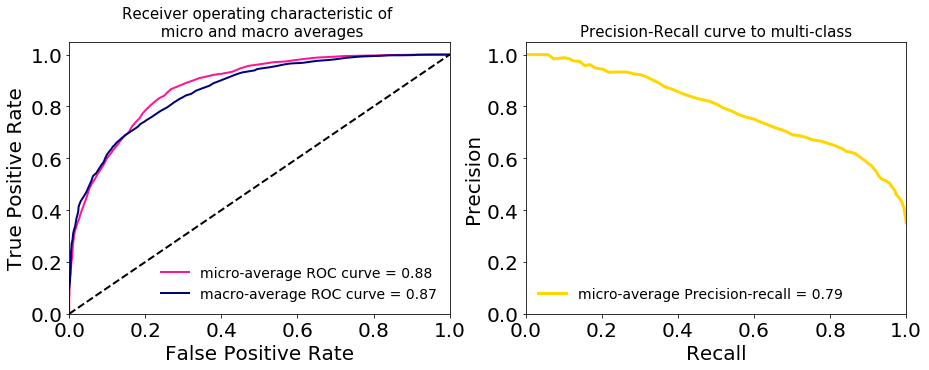

In [14]:
plots(RF, X_test, y_test, outputfile='RF_ROC_PR_plots.pdf')

## K-Nearst Neighbor

In [15]:
KNN = pickle.load(open('KNN_cap1.pkl','rb'))

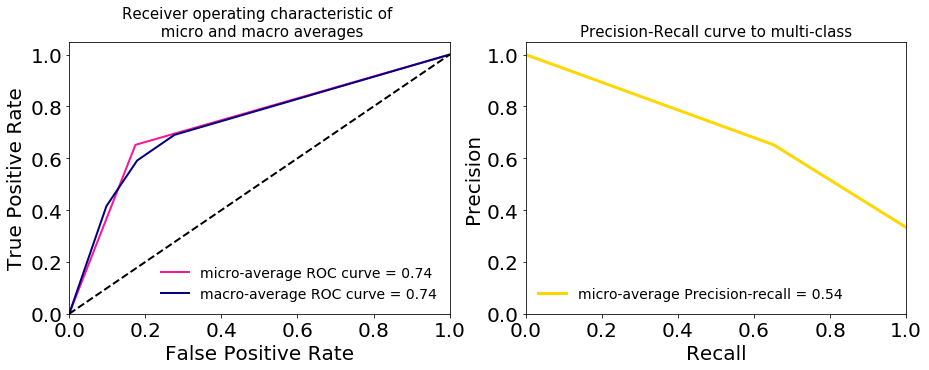

In [16]:
plots(KNN, X_test, y_test, outputfile='KNN_ROC_PR_plots.pdf')

## Support Vector Machine

In [17]:
SVM = pickle.load(open('SVM_cap1.pkl','rb'))

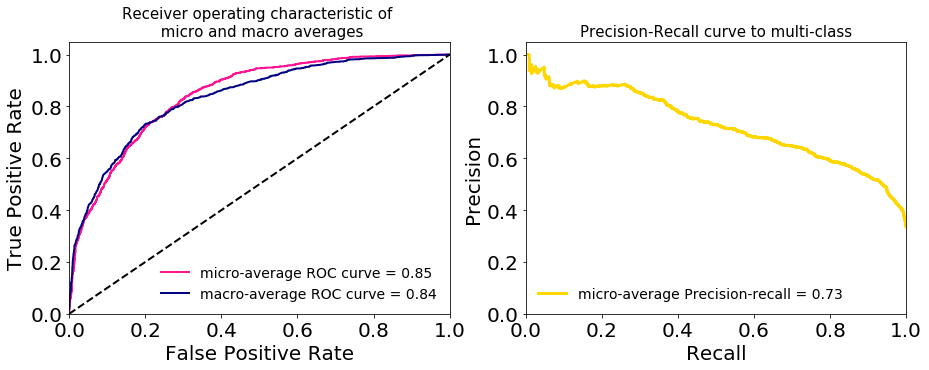

In [18]:
plots(SVM, X_test, y_test, outputfile='SVM_ROC_PR_plots.pdf')

## Gaussian Naive Bayes 

In [19]:
GNB = pickle.load(open('GNB_cap1.pkl','rb'))

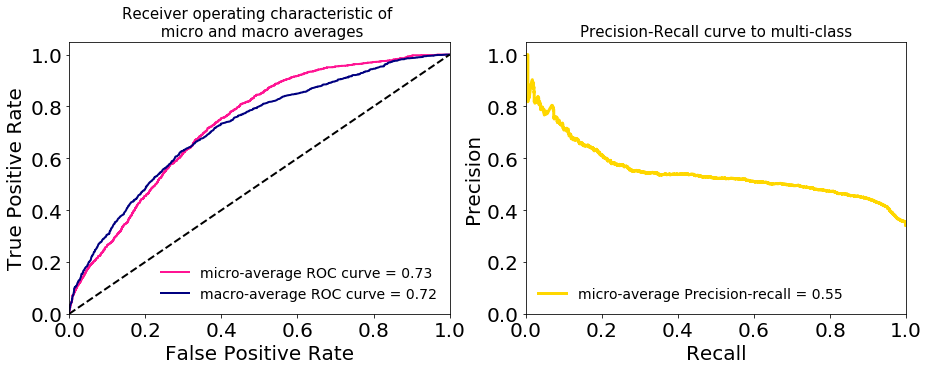

In [20]:
plots(GNB, X_test, y_test, outputfile='GNB_ROC_PR_plots.pdf')

## Plotting ROC and PR curves of all models together

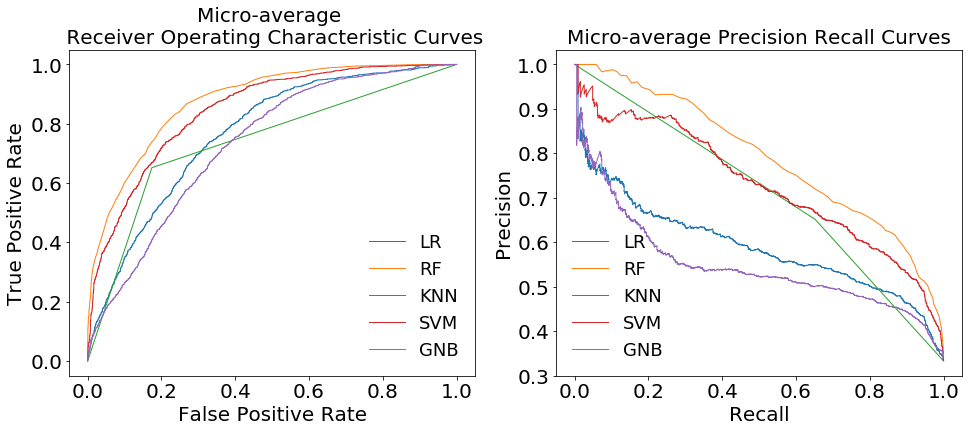

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

fpr_LR=dict()
tpr_LR=dict()
fpr_RF=dict()
tpr_RF=dict()
fpr_KNN=dict()
tpr_KNN=dict()
fpr_SVM=dict()
tpr_SVM=dict()
fpr_GNB=dict()
tpr_GNB=dict()

ax1 = plt.subplot(1, 2, 1)
#ROC Curves 
    # Serialize the output
X_test_series = X_test.values
y_test_series = y_test.values
y_bin = label_binarize(y_test_series, classes=[0,1,2])
n_classes = y_bin.shape[1]

y_score_LR = LR.predict_proba(X_test_series)
y_score_RF = RF.predict_proba(X_test_series)
y_score_KNN = KNN.predict_proba(X_test_series)
y_score_SVM = SVM.predict_proba(X_test_series)
y_score_GNB = GNB.predict_proba(X_test_series)

fpr_LR["micro"], tpr_LR["micro"], _ = roc_curve(y_bin.ravel(), y_score_LR.ravel())
fpr_RF["micro"], tpr_RF["micro"], _ = roc_curve(y_bin.ravel(), y_score_RF.ravel())
fpr_KNN["micro"], tpr_KNN["micro"], _ = roc_curve(y_bin.ravel(), y_score_KNN.ravel())
fpr_SVM["micro"], tpr_SVM["micro"], _ = roc_curve(y_bin.ravel(), y_score_SVM.ravel())
fpr_GNB["micro"], tpr_GNB["micro"], _ = roc_curve(y_bin.ravel(), y_score_GNB.ravel())
    
plt.plot(fpr_LR["micro"], tpr_LR["micro"], label= 'LR', lw=1)
plt.plot(fpr_RF["micro"], tpr_RF["micro"], label= 'RF', lw=1)
plt.plot(fpr_KNN["micro"], tpr_KNN["micro"], label= 'KNN', lw=1)
plt.plot(fpr_SVM["micro"], tpr_SVM["micro"], label= 'SVM', lw=1)
plt.plot(fpr_GNB["micro"], tpr_GNB["micro"], label= 'GNB', lw=1)

plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Micro-average \n Receiver Operating Characteristic Curves', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='lower right', fontsize=18, frameon=False)


ax2 = plt.subplot(1, 2, 2)

precision_LR = dict()
recall_LR = dict()
precision_RF = dict()
recall_RF = dict()
precision_KNN = dict()
recall_KNN = dict()
precision_SVM = dict()
recall_SVM = dict()
precision_GNB = dict()
recall_GNB = dict()

precision_LR["micro"], recall_LR["micro"], _ = precision_recall_curve(y_bin.ravel(), y_score_LR.ravel())
precision_RF["micro"], recall_RF["micro"], _ = precision_recall_curve(y_bin.ravel(), y_score_RF.ravel())
precision_KNN["micro"], recall_KNN["micro"], _ = precision_recall_curve(y_bin.ravel(), y_score_KNN.ravel())
precision_SVM["micro"], recall_SVM["micro"], _ = precision_recall_curve(y_bin.ravel(), y_score_SVM.ravel())
precision_GNB["micro"], recall_GNB["micro"], _ = precision_recall_curve(y_bin.ravel(), y_score_GNB.ravel())

plt.plot(recall_LR["micro"], precision_LR["micro"], label='LR', lw=1)
plt.plot(recall_RF["micro"], precision_RF["micro"], label='RF', lw=1)
plt.plot(recall_KNN["micro"], precision_KNN["micro"], label='KNN', lw=1)
plt.plot(recall_SVM["micro"], precision_SVM["micro"], label='SVM', lw=1)
plt.plot(recall_GNB["micro"], precision_GNB["micro"], label='GNB', lw=1)

plt.xlabel('Recall', size=20)
plt.ylabel('Precision', size=20)
plt.title('Micro-average Precision Recall Curves', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='lower left', fontsize=18, frameon=False)

plt.savefig('AllModels_ROC_PR_plots.pdf')

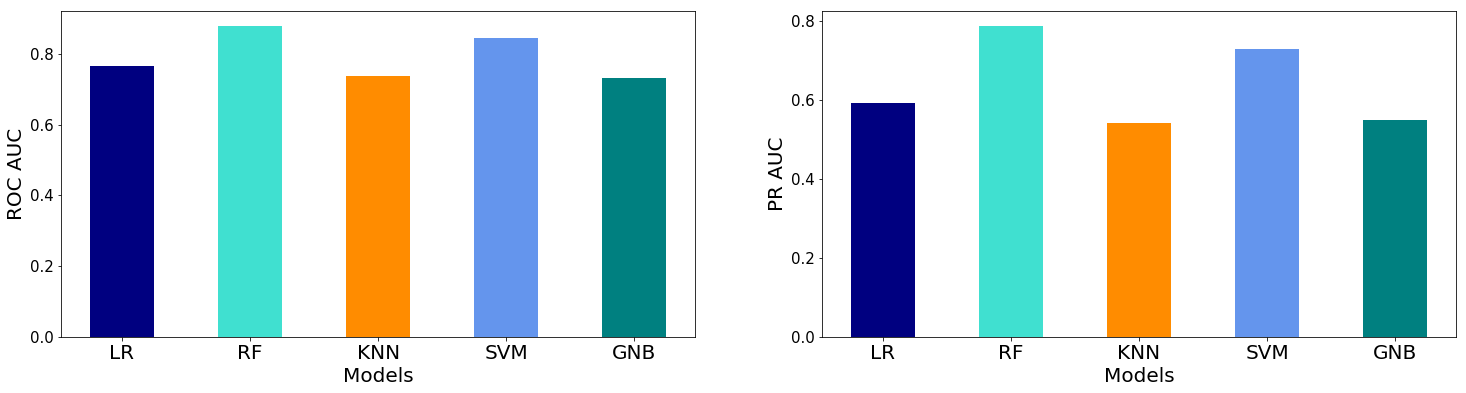

In [24]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

models = [LR,RF,KNN,SVM,GNB]
fpr = dict()
tpr = dict()
roc_auc = dict()
average_precision = dict()
micro_roc = []
micro_pr = []
clrs = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']

X_test_series = X_test.values
y_test_series = y_test.values
y_bin = label_binarize(y_test_series, classes=[0,1,2])
n_classes = y_bin.shape[1]

for i in models:
    y_score = i.predict_proba(X_test_series)
    fpr[i], tpr[i], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])
    micro_roc.append(roc_auc[i])
    average_precision[i] = average_precision_score(y_bin, y_score, average="micro")
    micro_pr.append(average_precision[i])

fig = plt.subplots(1,2,figsize=(25,6))

plt.subplot(1, 2, 1)
plt.bar(np.arange(5), micro_roc, width=0.5, color = clrs)
plt.xlabel('Models', size = 20)
plt.ylabel('ROC AUC', size = 20)
plt.yticks(np.arange(0,1,0.2), size = 15)
plt.xticks(np.arange(5),('LR', 'RF', 'KNN', 'SVM', 'GNB'), size = 20)

plt.subplot(1, 2, 2)
plt.bar(np.arange(5), micro_pr, width=0.5, color = clrs)
plt.xlabel('Models', size = 20)
plt.ylabel('PR AUC', size = 20)
plt.yticks(np.arange(0,1,0.2), size = 15)
plt.xticks(np.arange(5),('LR', 'RF', 'KNN', 'SVM', 'GNB'), size = 20)

plt.savefig('AllModels_ROC_PR_bars.pdf')

In [10]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

def plots(model, X_test, y_test, outputfile):
        
    #ROC Curves 
        # Serialize the output
    X_test_series = X_test.values
    y_test_series = y_test.values

        # Binarize the output
    y_bin = label_binarize(y_test_series, classes=[0,1,2])
    n_classes = y_bin.shape[1]
    
        # Learn to predict each class against the other
    y_score = model.predict_proba(X_test_series)

        # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area

        # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # A "micro-average": quantifying score on all classes jointly
    precision = dict()
    recall = dict()
    average_precision = dict()
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_bin.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_bin, y_score, average="micro")
    
    
        # Plot ROC curves
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
    ax1 = plt.subplot(1, 2, 1)
    
    #plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve = {0:0.2f}'
             ''.format(roc_auc["micro"]), color='deeppink', linewidth=2)

    plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve = {0:0.2f}'
             ''.format(roc_auc["macro"]), color='navy', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.title('Receiver operating characteristic of \n micro and macro averages', size=15)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    
        # Plot PR curve
    ax2 = plt.subplot(1, 2, 2)
    lines = []
    labels = []

    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=3)
    lines.append(l)
    labels.append('micro-average Precision-recall = {0:0.2f}'''.format(average_precision["micro"]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', size=20)
    plt.ylabel('Precision', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.title('Precision-Recall curve to multi-class', size=15)
    plt.legend(lines, labels, loc=('lower left'), fontsize=14, frameon=False)
    
    plt.savefig(outputfile)
    plt.show()